# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino
Spring 2024

Name: Poorva Patel

Date: 2/29/24

  Only Murders in the...Database?
An introduction to navigating SQL databases using R and Jupyter Notebook. 

Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City!

Your task for Assignment #5 is to complete the following objectives:

You are a data scientist that was hired by SQL City. Your objectives are as follows:

    Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.

    Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? 

    Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?
    
Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. 
For each query include comments such as "SELECT all records FROM table WHERE column name = X"
Answer any prompts in markdown cells.

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield

Basic usage of database commands in R with SQLite library: https://rsqlite.r-dbi.org/
SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [1]:
library("RSQLite")

In [2]:
#Connect to our .db file using library RSQLite:
db <- dbConnect(dbDriver("SQLite"), dbname = "sql-murder-mystery.db")

In [3]:
#For a quick reference for tables and columns, refer to schema on Blackboard, or run code below:
#What are the column names for each table? What table will help us get to the next clue?
print("crime_scene_report") 
dbListFields(db, 'crime_scene_report')
print("drivers_license") 
dbListFields(db, 'drivers_license')
print("Facebook_event_checkin") 
dbListFields(db, 'facebook_event_checkin')
print("get_fit_now_check_in") 
dbListFields(db, 'get_fit_now_check_in')
print("get_fit_now_member") 
dbListFields(db, 'get_fit_now_member')
print("income") 
dbListFields(db, 'income')
print("interview") 
dbListFields(db, 'interview')
print("person") 
dbListFields(db, 'person')
print("solution") 
dbListFields(db, 'solution')

[1] "crime_scene_report"


[1] "date"        "type"        "description" "city"

[1] "drivers_license"


[1] "id"           "age"          "height"       "eye_color"    "hair_color"  
[6] "gender"       "plate_number" "car_make"     "car_model"

[1] "Facebook_event_checkin"


[1] "person_id"  "event_id"   "event_name" "date"

[1] "get_fit_now_check_in"


[1] "membership_id"  "check_in_date"  "check_in_time"  "check_out_time"

[1] "get_fit_now_member"


[1] "id"                    "person_id"             "name"                 
[4] "membership_start_date" "membership_status"

[1] "income"


[1] "ssn"           "annual_income"

[1] "interview"


[1] "person_id"  "transcript"

[1] "person"


[1] "id"                  "name"                "license_id"         
[4] "address_number"      "address_street_name" "ssn"

[1] "solution"


[1] "user"  "value"

We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

In [4]:
#Practice analyzing COUNTS in data tables with SQL queries:
#Brainstorming for Objective 1
#We can find the top ten cities within our Murder Mystery database that had the most crimes by using the COUNT SQL command.
#SELECT the cities that have the most counts within the table crime_scene_report and
#GROUP the results BY city and ORDER BY a DESC count, only show a limit of 10 records:
practice_cities <- dbSendQuery(db, "SELECT city, COUNT(*) as count
                            From crime_scene_report
                            GROUP BY city
                            ORDER BY count DESC
                            LIMIT 10")
dbFetch(practice_cities)

#Looks like SQL City and Murfeesboro have the highest number of crimes! 

#Use COUNT(*) as count to determine the answers to the objectives below. 

city,count
<chr>,<int>
SQL City,9
Murfreesboro,9
Toledo,8
Jersey City,8
Evansville,8
Duluth,8
Wilmington,7
Waterbury,7
Reno,7


<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.

In [10]:
#Quick graphing library for a visual for objective 1:
library('ggplot2')

In [19]:
objective1 <- dbSendQuery(db, "SELECT type, COUNT(*) as count
                            From crime_scene_report
                            GROUP BY type
                            ORDER BY count DESC
                            LIMIT 10")
#Save our query into a dataframe that we can use to visualize results in ggplot2:
objective1_dataframe <- dbFetch(objective1)
print(objective1_dataframe)


Warning message:
“Closing open result set, pending rows”


       type count
1    murder   148
2     arson   148
3   assault   145
4     theft   141
5   bribery   135
6   robbery   134
7     fraud   130
8 blackmail   130
9 smuggling   117


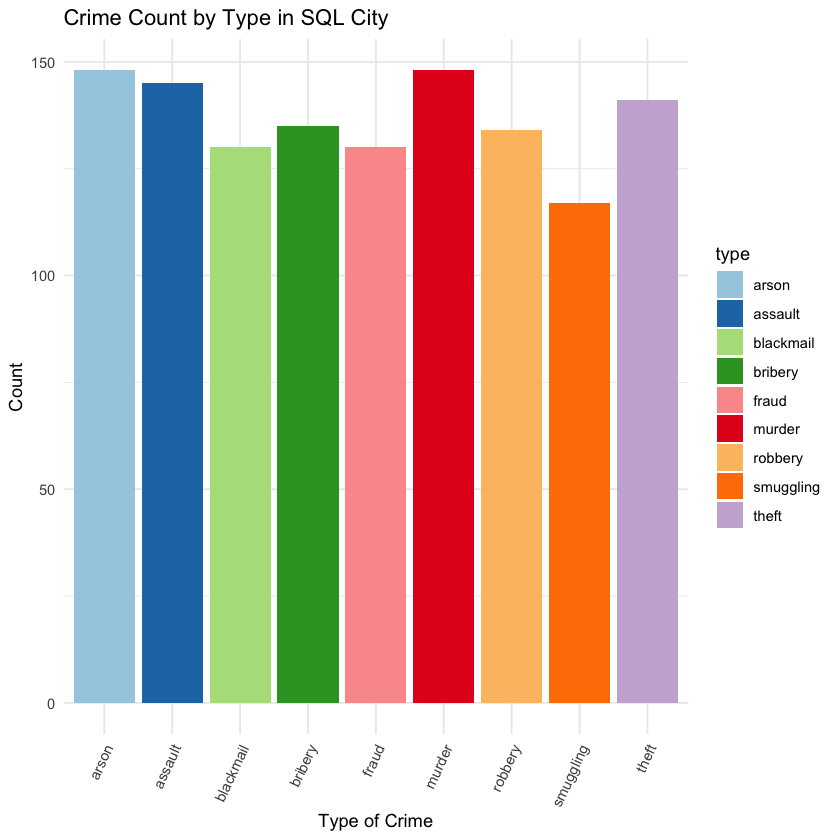

In [20]:
#Graph our results:

ggplot(objective1_dataframe, aes(x = type, y = count, fill = type)) + #structure of graph
  geom_bar(stat = "identity") + 
  theme_minimal() + 
  labs(title = "Crime Count by Type in SQL City", #create labels
       x = "Type of Crime",
       y = "Count") + 
  theme(axis.text.x = element_text(angle = 65, hjust = 1)) + #adjust axis
  scale_fill_brewer(palette = "Paired") #color


Answer:The two types of crime are murder and arson.

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime?

In [42]:
objective2 <- dbSendQuery(db, "SELECT SUBSTR(date, 1, 7) AS month, COUNT(*) as count
                               FROM crime_scene_report
                               WHERE date IS NOT NULL AND date != ''  -- Ensure that date is not null or empty
                               GROUP BY month
                               ORDER BY count DESC
                               LIMIT 1")

objective2_dataframe <- dbFetch(objective2)
print(objective2_dataframe)


    month count
1 2017062    40


Answer: The month of June.

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

In [43]:
objective3 <-  dbSendQuery(db, "SELECT membership_status, COUNT(*) as count
                            From get_fit_now_member
                            GROUP BY membership_status
                            ORDER BY count DESC
                            LIMIT 10")

objective3_dataframe <- dbFetch(objective3)
print(objective3_dataframe)



Warning message:
“Closing open result set, pending rows”


  membership_status count
1              gold    68
2            silver    63
3           regular    53


Answer: The regular membership.

In [45]:
#Disconnect from the database. Always remember to disconnect :) 
dbDisconnect(db)


Warning message in connection_release(conn@ptr):
“Already disconnected”
